![Dia and Co](https://raw.githubusercontent.com/interviewquery/takehomes/dia_and_co_1/dia_and_co_1/logo.png)

# Books&Co

## Problem formulation

We are a mail-delivery book startup. You fill out a profile with us
about your book preferences, and we will send you 5 books each month
for free. Whatever you like you keep and pay for, and whatever you
don't like you send back. Sound familiar?

As a company we have to buy our books ahead of time. We took out a
loan last month to buy our original batch of books. The value of the
loan was the total cost of all the books that we bought. We made some
money back through customers buying our books last month. Next month,
we know which books we will be sending to which customers, but we do
not know who will buy what books. It costs \$0.60/book each way for
shipping books to and from customers. The question for you to answer
is:

*Will we be able to both pay back our loan and afford our next book
purchase order?*

## Data

We've provided some data for you to help answer this question. All of
the following are `csv` files.

- `original_purchase_order`: Quantity of books originally purchased
indexed by a unique product ID. 
- `next_purchase_order`: Planned quantity
of books to purchase at the end of next month indexed by a unique
product ID.
- `customer_features`: Customer features generated by the profiles that
customers fill out with us indexed by a unique customer ID.
- `product_features`: Product features that we have generated from our
knowledge of our books indexed by a unique product ID.
- `last_month_assortment`: Data on which books were sent to which
customers and whether or not the customer purchased the book. There is
no index.
- `next_month_assortment`: Data on which books will be sent to which
customers next month. There is no index.

## Purpose

The purpose of this test is to assess how well you translate business
problems into machine learning solutions as well as get an
understanding of your coding ability and style. This is also a chance
to give you insights into our business and some problems that we may
be thinking about.

This test serves as a minimum bar that we set for interviewing
candidates. You do not get extra consideration for going above and
beyond the requirements of the test because we do not wish to favor
candidates with infinite free time.

We do not want to assess your feature engineering prowess or how
accurate you can make your machine learning model because we do not
want you to spend all day on this. With that being said, you should
build valid features and have solid reasoning behind the parameters
that you have chosen for your model.

We are trying to be respectful of your time. We are not assessing how
elaborate your script can be - we do not expect logging or anything
like that.

We expect you to spend no more than 3 hours on this assessment.

## Expectations

Your response to this assessment should be a script that can be run on
the command line, reads in the necessary data files as arguments to
the script, runs the necessary calculations, and finally prints
`"Yes"` or `"No"` to the question of whether or not we can pay back
our loan and afford the next book purchase order.

Below is an example of how this might be run:

```bash
$ python are_we_going_to_survive.py original_purchase_order.csv
next_pur chase_order.csv customer_features.csv product_features.csv
last_month_as sortment.csv next_month_assortment.csv
```


Please write your script in Python. We use Python for all of our
internal data science systems and would like you to be able to
integrate yourself as quickly as possible should you start working
here. Try to make your code as clean as possible - we suggest
following [PEP8](https://www.python.org/dev/peps/pep0008/)
conventions. You should create some sort of machine learning model for
answering the question (as
opposed to simply looking at average conversion rate or something like
that). However, we do not expect you to build models from scratch.
`numpy`, `scipy`, `scikit-learn`, and everything else is all fair game.

Lastly, please write a brief description explaining:

- Which machine learning model you chose to use and why

- How you validated your model and why you chose to validate it in this
way.

- How to run your script (e.g. like the example above).


# Including all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import sys
import ast
import os

# reading all files into dataframes
    testing:
    opo = pd.read_csv('original_purchase_order.csv')
    npo = pd.read_csv('next_purchase_order.csv')
    cf = pd.read_csv('customer_features.csv')
    pf = pd.read_csv('product_features.csv')
    lma = pd.read_csv('last_month_assortment.csv')
    nma = pd.read_csv('next_month_assortment.csv')

In [2]:
opo, npo, cf, pf, lma, nma = pd.read_csv('original_purchase_order.csv'), pd.read_csv('next_purchase_order.csv'),pd.read_csv('customer_features.csv'),pd.read_csv('product_features.csv'),pd.read_csv('last_month_assortment.csv'), pd.read_csv('next_month_assortment.csv')
opo.head(20)


,product_id,quantity_purchased,cost_to_buy,retail_value
0,1769808,77,2.20,16.67
1,1896283,67,1.46,9.59
2,1889979,80,2.06,13.36
3,1341288,85,1.25,6.57
4,1666328,60,1.51,10.49
5,1905180,95,2.10,16.62
6,1014973,87,2.39,15.57
7,1888794,92,1.82,9.74
8,1078720,64,2.39,15.27
9,1315866,60,1.24,6.50


# Q1. Money revenue for this month
Data munging

In [3]:
opo = opo.set_index('product_id')
opo['total_purchase_cost'] = opo['quantity_purchased'] * opo['cost_to_buy']
original_sold = opo.join(lma.set_index('product_id'))
original_sold.head(20)

,quantity_purchased,cost_to_buy,retail_value,total_purchase_cost,customer_id,purchased
product_id,,,,,,
1003455,76,2.26,13.48,171.76,1013996,False
1003455,76,2.26,13.48,171.76,1028959,False
1003455,76,2.26,13.48,171.76,1032234,False
1003455,76,2.26,13.48,171.76,1054320,False
1003455,76,2.26,13.48,171.76,1063990,False
1003455,76,2.26,13.48,171.76,1074055,False
1003455,76,2.26,13.48,171.76,1104201,False
1003455,76,2.26,13.48,171.76,1126037,False
1003455,76,2.26,13.48,171.76,1126655,True


# getting the cost values

In [4]:
current_loan = opo['total_purchase_cost'].sum()
current_sold_df = original_sold[original_sold['purchased'] == True]
# current_sold_df.info()
# current_sold_df.describe()
current_sold = current_sold_df['retail_value'].sum()
# print(current_sold)
current_shipping_cost = 0.6*len(current_sold_df) + 0.6*2*(len(lma) - len(current_sold_df))
# print(current_shipping_cost)
current_month_profit = current_sold - current_loan - current_shipping_cost
print(current_month_profit)

-19521.659999999996


# Q2. Books being ordered next month

In [5]:
npo = npo.set_index('product_id')
npo['total_purchase'] = npo['quantity_purchased'] * npo['cost_to_buy']
#get expences for next month order
next_month_loan = npo['total_purchase'].sum()
print(next_month_loan)

24155.510000000002


# Q3. Books being sold next month.
dummify the customer and product features
join them to the current month order to create training set
train the model and return the model and dummified datasets

In [6]:
# Train the model
mlb = MultiLabelBinarizer()
cf['favorite_genres'] = cf['favorite_genres'].apply(lambda x: ast.literal_eval(x))
# cf.head(20)
cf_df = cf.join(pd.DataFrame(mlb.fit_transform(cf['favorite_genres']), 
                             columns=mlb.classes_, 
                             index = cf.index))
cf_df = cf_df.join(pd.DataFrame(pd.get_dummies(cf['age_bucket'])))
pf_df = pf.join(pd.DataFrame(pd.get_dummies(pf['genre'])))
# cf_df.head()
cf_df = cf_df.set_index('customer_id')
pf_df = pf_df.set_index('product_id')
pf_retail = pf_df.join(opo['retail_value'])
# pf_retail.head()
cust = lma.set_index('customer_id').join(cf_df)
cust = cust.reset_index()
train = cust.set_index('product_id').join(pf_retail, lsuffix='_product')
# train.head()
x = train.drop(['age_bucket', 'favorite_genres', 'genre', 'purchased', 'customer_id'], axis=1)
y = train['purchased'].values
model = XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=1000, random_state=42)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, random_state=42)
model.fit(train_x, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

predicting and estimating the result

In [7]:
y_pred = model.predict(test_x)
print("XGBoost Classifier report: \n\n", classification_report(test_y, y_pred))
print("Test Accuracy: {}%".format(round(model.score(test_x, test_y)*100, 2)))


XGBoost Classifier report: 

               precision    recall  f1-score   support

       False       0.82      0.84      0.83      2359
        True       0.68      0.64      0.66      1241

    accuracy                           0.77      3600
   macro avg       0.75      0.74      0.74      3600
weighted avg       0.77      0.77      0.77      3600

Test Accuracy: 77.03%


Confusion matrix

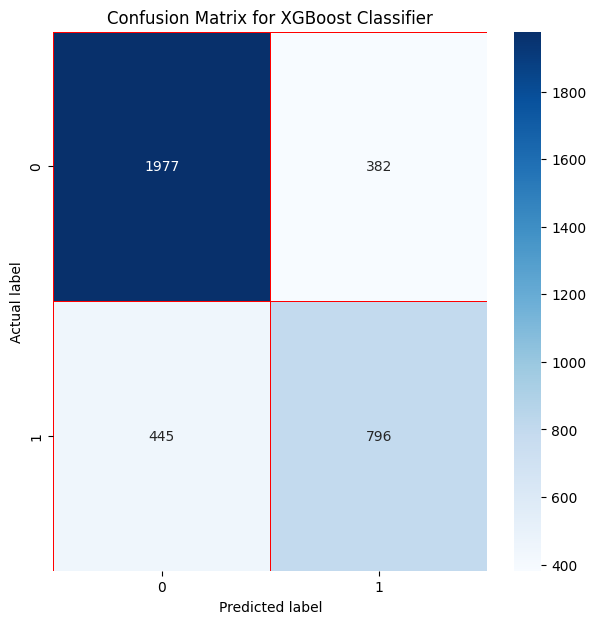

In [8]:
cm = confusion_matrix(test_y, y_pred)
x_axis_labels = ['Not Purchased', 'Purchased']
y_axis_labels = ['Not Purchased', 'Purchased']

f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor='red', fmt='.0f', ax=ax, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

In [9]:
# from sklearn.model_selection import GridSearchCV

# ## Define hyperparameter grid

# param_grid = {
#     'random_state': [42, 84, 126, 168, 210]

# }

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
# grid_search.fit(train_x, train_y)

# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

Append the original purchase order with the next assortment, 
send books it does not have

In [10]:
nto = opo.append(npo)
# nma.head()
npf_retail = pf_df.join(nto['retail_value'])
cust = nma.set_index('customer_id').join(cf_df)
cust = cust.reset_index()
test = cust.set_index('product_id').join(npf_retail, lsuffix='_product')
x_test = test.drop(['age_bucket', 'favorite_genres', 'genre', 'customer_id'], axis=1)
test['prediction'] = model.predict(x_test)
pred_sold = test[test['prediction'] == True]
pred_sold.info()
pred_sold.describe()

C:\Users\kkamo\AppData\Local\Temp\ipykernel_6884\1526605623.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nto = opo.append(npo)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19678 entries, 1004302 to 1997722
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             19678 non-null  int64  
 1   age_bucket              18866 non-null  object 
 2   is_returning_customer   19678 non-null  bool   
 3   favorite_genres         19678 non-null  object 
 4   Beach-Read_product      19678 non-null  int32  
 5   Biography_product       19678 non-null  int32  
 6   Classic_product         19678 non-null  int32  
 7   Drama_product           19678 non-null  int32  
 8   History_product         19678 non-null  int32  
 9   Pop-Psychology_product  19678 non-null  int32  
 10  Pop-Sci_product         19678 non-null  int32  
 11  Romance_product         19678 non-null  int32  
 12  Sci-Fi_product          19678 non-null  int32  
 13  Self-Help_product       19678 non-null  int32  
 14  Thriller_product        19678 

,customer_id,Beach-Read_product,Biography_product,Classic_product,Drama_product,History_product,Pop-Psychology_product,Pop-Sci_product,Romance_product,Sci-Fi_product,...,Drama,History,Pop-Psychology,Pop-Sci,Romance,Sci-Fi,Self-Help,Thriller,retail_value,prediction
count,1.967800e+04,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,...,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.0
mean,1.545866e+06,0.480587,0.461988,0.479215,0.491107,0.485212,0.486940,0.482722,0.474794,0.487092,...,0.128722,0.040197,0.054528,0.068909,0.162669,0.085629,0.031660,0.130247,11.810439,1.0
std,2.881704e+05,0.499636,0.498566,0.499581,0.499934,0.499794,0.499842,0.499714,0.499377,0.499846,...,0.334901,0.196426,0.227062,0.253307,0.369073,0.279822,0.175097,0.336584,3.078491,0.0
min,1.000078e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.220000,1.0
25%,1.294249e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.330000,1.0
50%,1.592526e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.520000,1.0
75%,1.796076e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.880000,1.0
max,1.999593e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.290000,1.0


# Q4. Find the revenue for next month

In [11]:
next_month_revenue = pred_sold['retail_value'].sum()
next_month_shipping_cost = 0.6*len(pred_sold) + 0.6*2*(len(test) - len(pred_sold))
expenses = abs(current_month_profit - next_month_revenue - next_month_shipping_cost)
profit = next_month_revenue - expenses
print(profit)
if profit > 0:
    print('Yes')
else:
    print('No')

-95395.26000000001
No
